# UAS PENDATA
### Fahrizal umam 230411100056

## Prediksi Kelangsungan Hidup Pasien Sirosis
link dataset:

https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1

Dataset yang digunakan dalam penelitian ini berasal dari studi klinis yang dilakukan oleh Mayo Clinic pada tahun 1974 hingga 1984, yang bertujuan untuk menganalisis kelangsungan hidup pasien dengan penyakit Primary Biliary Cirrhosis (PBC), yaitu salah satu bentuk sirosis hati akibat kerusakan hati kronis yang berlangsung lama. Studi ini melibatkan 424 pasien, dengan 312 pasien mengikuti uji coba acak terhadap obat D-penicillamine, sedangkan 112 pasien lainnya tidak mengikuti uji coba namun tetap menyetujui untuk dicatat metrik dasarnya serta dilakukan pelacakan terhadap status kelangsungan hidup. Dari 112 pasien tersebut, hanya 106 yang memiliki data lengkap, karena enam di antaranya tidak dapat dilacak setelah diagnosis awal.

Dataset ini merepresentasikan data individu manusia dan mengandung atribut yang bersifat sensitif, seperti usia dan jenis kelamin. Oleh karena itu, pengolahan data dilakukan dengan memperhatikan etika dan privasi. Sebelum digunakan untuk analisis, dilakukan beberapa tahapan pra-pemrosesan data, antara lain: menghapus baris dengan nilai kosong (missing value) pada kolom obat, melakukan imputasi nilai kosong pada atribut numerik menggunakan nilai rata-rata (mean), serta menerapkan teknik one-hot encoding untuk atribut kategorikal. Dataset ini mengandung sejumlah nilai hilang yang ditandai dengan simbol NA, yang telah ditangani selama proses praproses data.


In [25]:
pip install ucimlrepo

In [26]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878)

# data (as pandas dataframes)
X = cirrhosis_patient_survival_prediction.data.features
y = cirrhosis_patient_survival_prediction.data.targets

# metadata
print(cirrhosis_patient_survival_prediction.metadata)

# variable information
print(cirrhosis_patient_survival_prediction.variables)


{'uci_id': 878, 'name': 'Cirrhosis Patient Survival Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1', 'data_url': 'https://archive.ics.uci.edu/static/public/878/data.csv', 'abstract': 'Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 418, 'num_features': 17, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Age', 'Sex'], 'target_col': ['Status'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5R02G', 'creators': ['E. Dickson', 'P. Grambsch', 'T. Fleming', 'L. Fisher', 'A. Langworthy'], 'intro_paper': {'ID': 296, 'type'

## Data understanding


###  Load Data

In [27]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch dataset
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878)

# Pisahkan fitur dan target
X = cirrhosis_patient_survival_prediction.data.features
y = cirrhosis_patient_survival_prediction.data.targets

# Gabungkan untuk analisis
df = pd.concat([X, y], axis=1)


###  Tinjau Struktur Data

In [28]:
print(df.shape)
print(df.info())
print(df.describe())
print(df.head())


(418, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Drug           313 non-null    object 
 1   Age            418 non-null    int64  
 2   Sex            418 non-null    object 
 3   Ascites        313 non-null    object 
 4   Hepatomegaly   313 non-null    object 
 5   Spiders        313 non-null    object 
 6   Edema          418 non-null    object 
 7   Bilirubin      418 non-null    float64
 8   Cholesterol    312 non-null    object 
 9   Albumin        418 non-null    float64
 10  Copper         312 non-null    object 
 11  Alk_Phos       312 non-null    float64
 12  SGOT           312 non-null    float64
 13  Tryglicerides  312 non-null    object 
 14  Platelets      411 non-null    object 
 15  Prothrombin    416 non-null    float64
 16  Stage          412 non-null    float64
 17  Status         418 non-null    object 
dtype

###  Tinjau Target (Status)

In [29]:
print(df['Status'].value_counts())


Status
C     232
D     161
CL     25
Name: count, dtype: int64


### Tinjau Missing Value

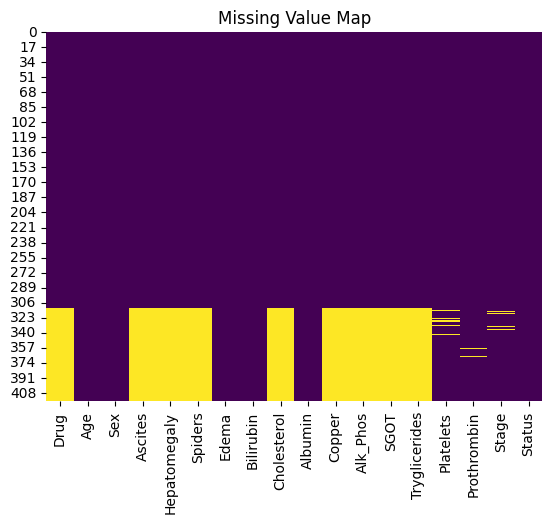

Drug             105
Age                0
Sex                0
Ascites          105
Hepatomegaly     105
Spiders          105
Edema              0
Bilirubin          0
Cholesterol      106
Albumin            0
Copper           106
Alk_Phos         106
SGOT             106
Tryglicerides    106
Platelets          7
Prothrombin        2
Stage              6
Status             0
dtype: int64


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Map")
plt.show()

print(df.isnull().sum())


## Preprocessing


###  Salin dan Drop Kolom ID

In [31]:
df_clean = df.copy()
df_clean.drop(columns=['ID'], errors='ignore', inplace=True)


### Encode Fitur Kategorikal

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))


### Pisahkan Fitur & Target

In [33]:
X = df_clean.drop('Status', axis=1)
y = df_clean['Status']


###  Imputasi Missing Values

In [34]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # bisa juga pakai 'median'
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


### Standarisasi Data

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


### Split Data

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Modelling


### Import Model

In [37]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


### Inisialisasi dan Latih Model

In [38]:
svm = SVC()
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()

svm.fit(X_train, y_train)
knn.fit(X_train, y_train)
nb.fit(X_train, y_train)


GaussianNB()

## Evaluasi


### Prediksi

In [39]:
svm_pred = svm.predict(X_test)
knn_pred = knn.predict(X_test)
nb_pred  = nb.predict(X_test)


### Evaluasi Akurasi dan Classification Report

In [40]:
from sklearn.metrics import classification_report, accuracy_score

print("=== SVM ===")
print(classification_report(y_test, svm_pred))
print("Akurasi:", accuracy_score(y_test, svm_pred))

print("=== KNN ===")
print(classification_report(y_test, knn_pred))
print("Akurasi:", accuracy_score(y_test, knn_pred))

print("=== Naive Bayes ===")
print(classification_report(y_test, nb_pred))
print("Akurasi:", accuracy_score(y_test, nb_pred))


=== SVM ===
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        44
           1       0.00      0.00      0.00         4
           2       0.78      0.78      0.78        36

    accuracy                           0.77        84
   macro avg       0.52      0.54      0.53        84
weighted avg       0.74      0.77      0.75        84

Akurasi: 0.7738095238095238
=== KNN ===
              precision    recall  f1-score   support

           0       0.67      0.84      0.75        44
           1       0.00      0.00      0.00         4
           2       0.75      0.58      0.66        36

    accuracy                           0.69        84
   macro avg       0.47      0.47      0.47        84
weighted avg       0.67      0.69      0.67        84

Akurasi: 0.6904761904761905
=== Naive Bayes ===
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        44
           1       0.00      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Confusion Matrix Visualisasi

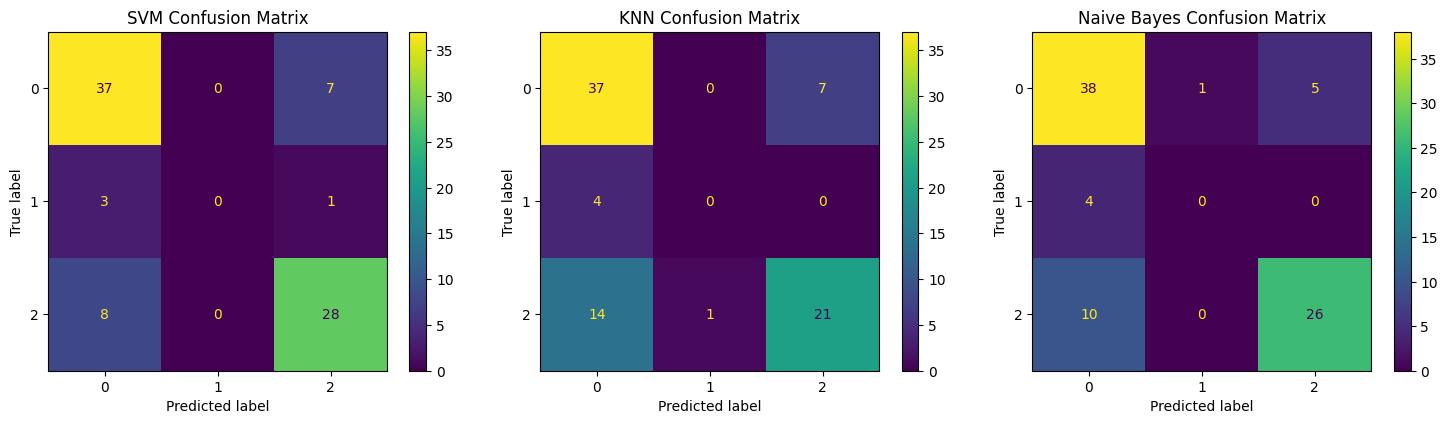

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for ax, model, pred, title in zip(
    axs, [svm, knn, nb], [svm_pred, knn_pred, nb_pred], ['SVM', 'KNN', 'Naive Bayes']
):
    ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax)
    ax.set_title(f"{title} Confusion Matrix")

plt.tight_layout()
plt.show()


## Hasil Deploy

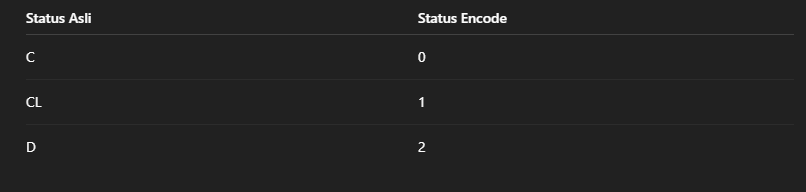

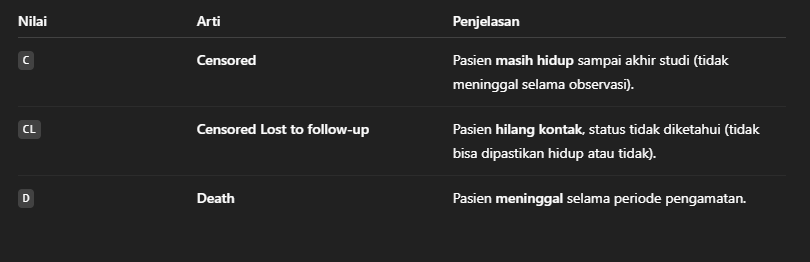

### Manual prediksi

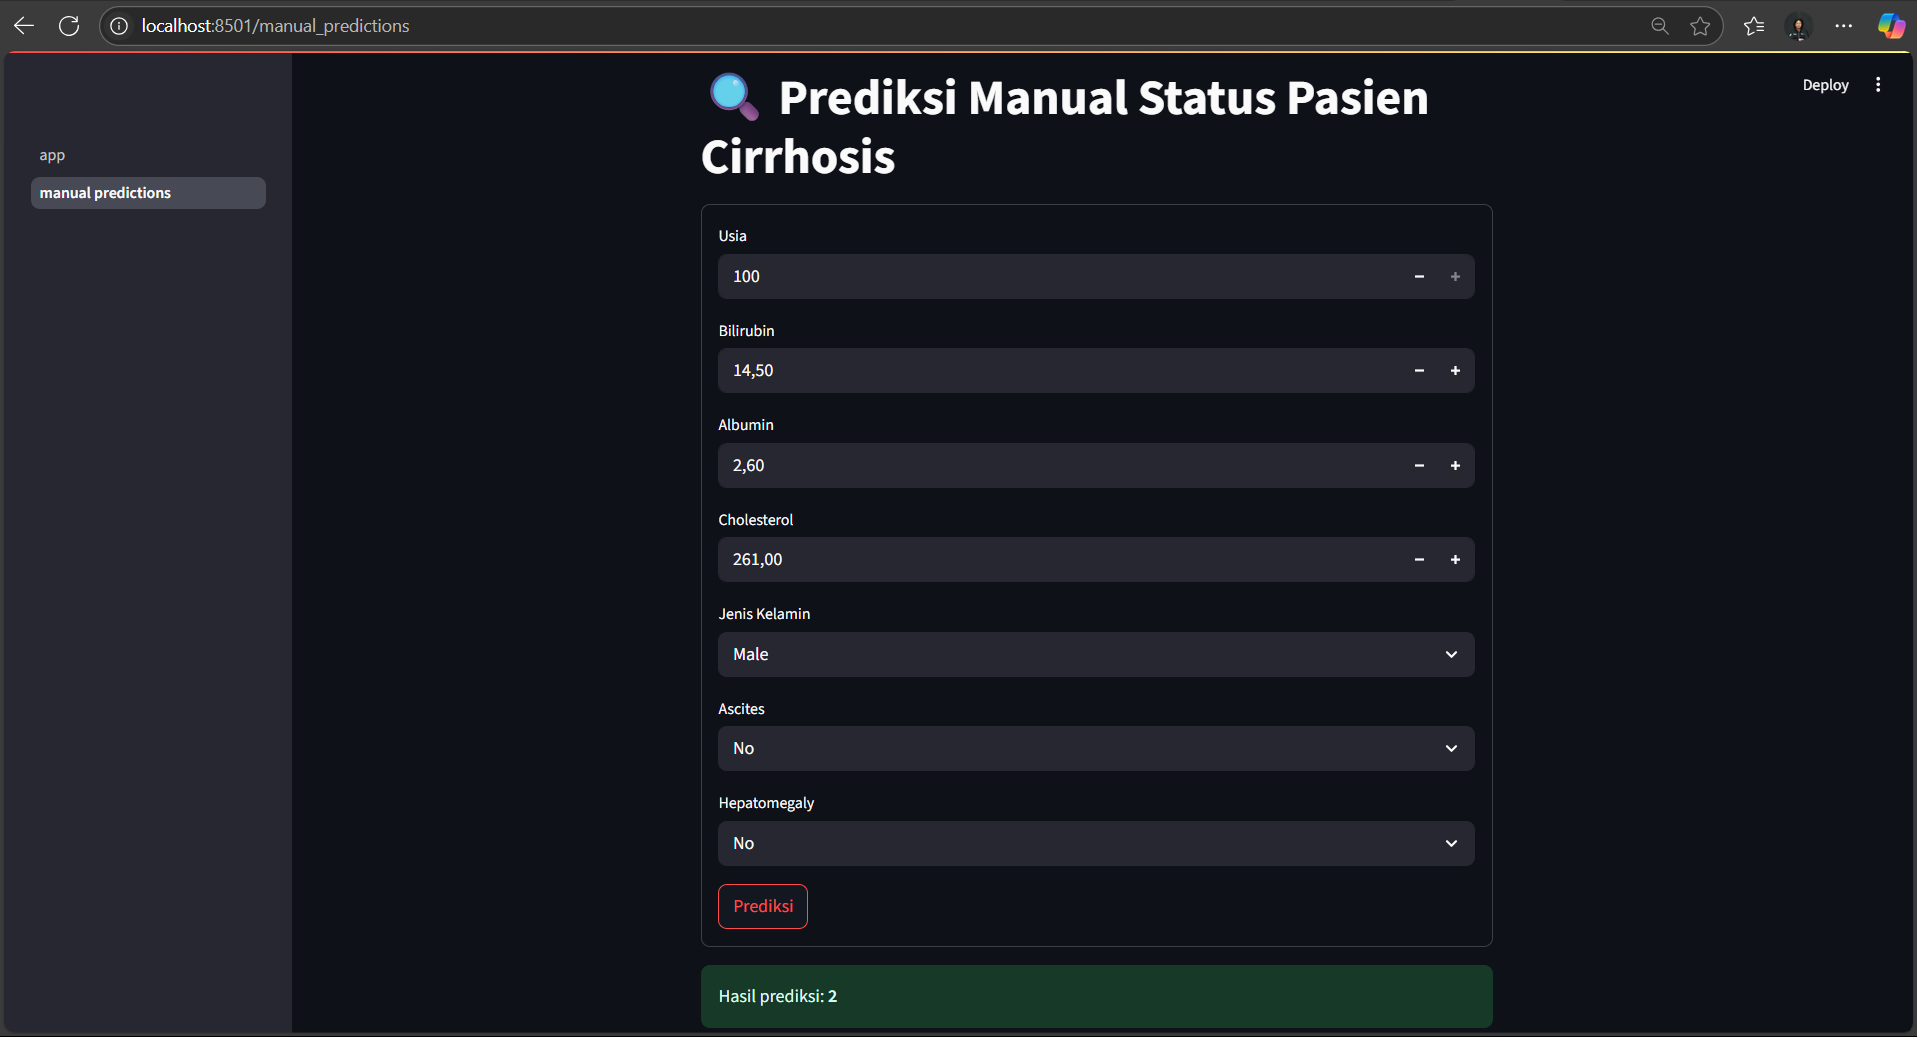

## Aplikasi web

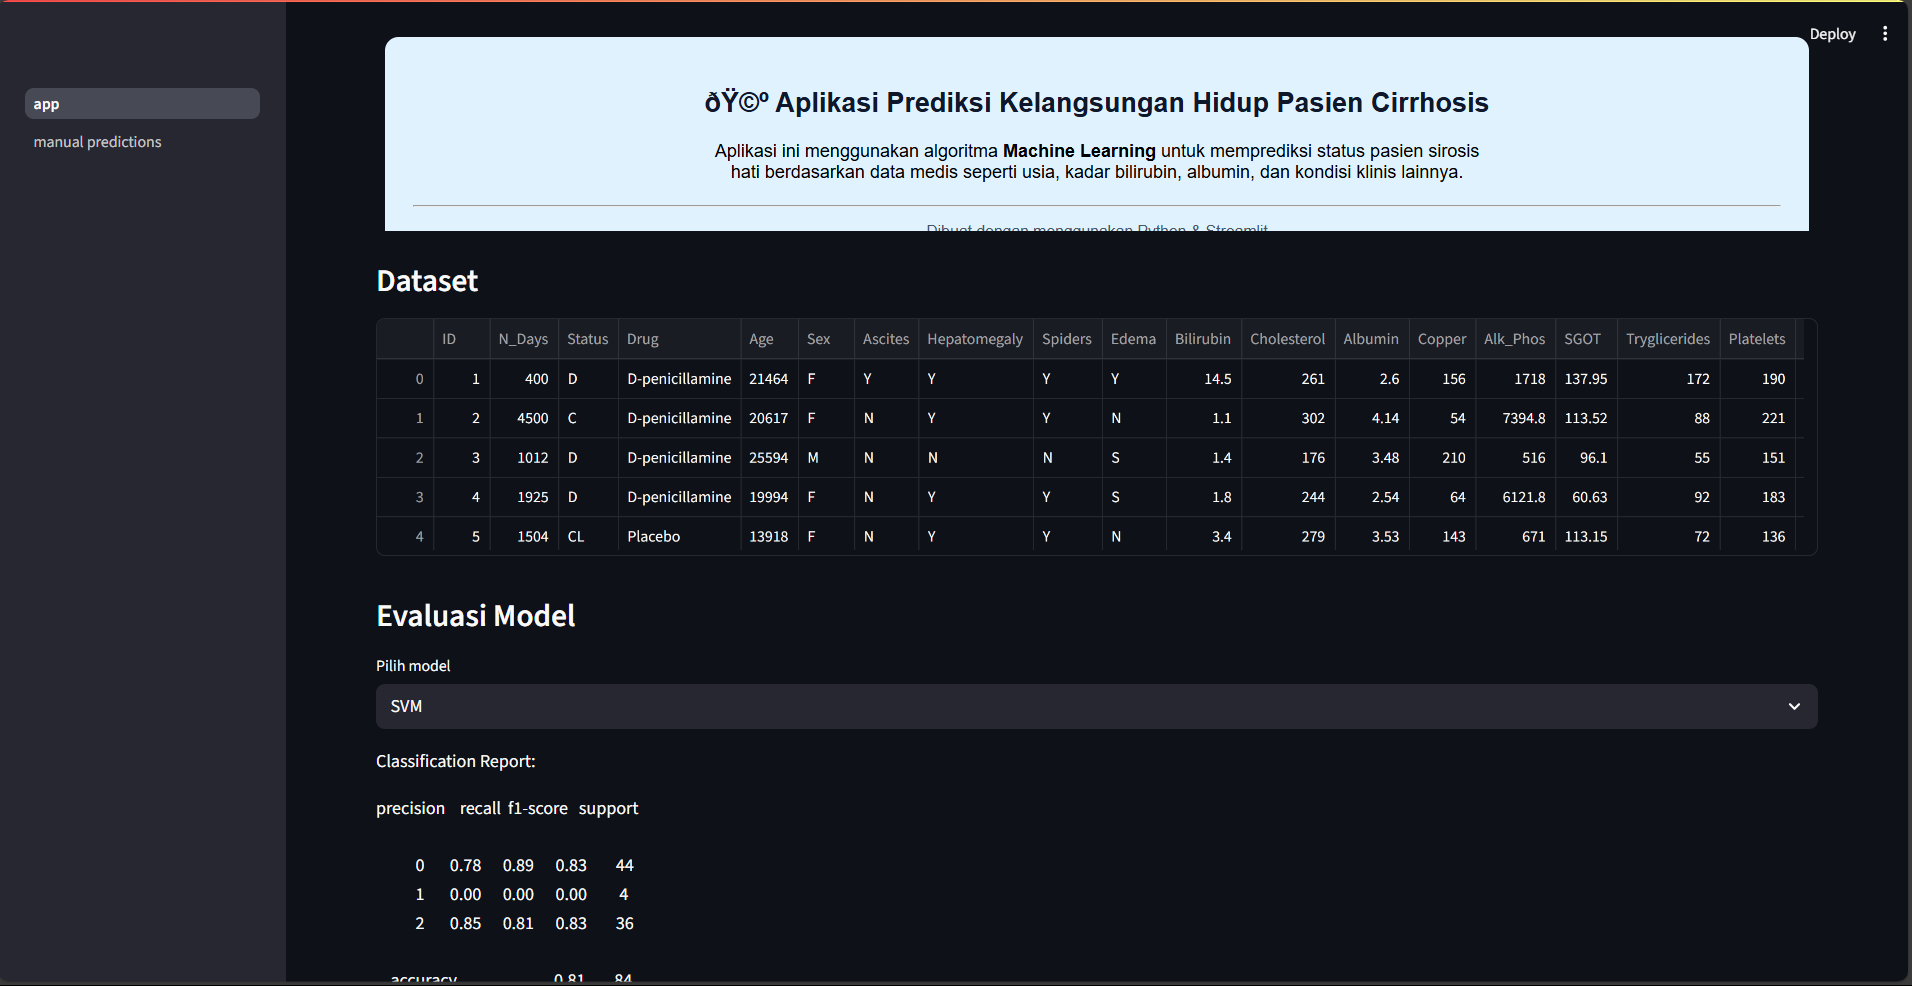

## link deploy

https://pendata-fahrizalumam.streamlit.app/